# Gym Littering Modeling
In this notebook the experiments from the paper about "Gym Littering Modeling" are run. The main parts of the model are run in the ```gymmodel.py```.

## Importing main codebase

In [1]:
import gymmodel
import mesa

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import random

## Experiment 1: Effect of Environment Effect

In [2]:
np.random.seed(345)
random.seed(345)
N_sim = 50

In [3]:
results = mesa.batch_run(
    gymmodel.GymModel,
    {
        "num_employees": 2,
        "num_attendees": 10,
        "gym_width": 20,
        "gym_depth": 20,
        "base_inc_utility": [-6, -5, -4, -3, -2, -1],
        "environment_effect": [
            v for v in np.linspace(1, 25, 51)
        ],
        "employee_effect": -2,
        "attendee_lambda": 1,
        "weights": 50,
        "init_incorrect_weights": 0,
        "benches":3,
        "deadlifts": 3,
        "free_weights": 3,
    },
    number_processes=None,
    iterations=N_sim,
    data_collection_period=1,
    max_steps=1000
)

  0%|          | 0/15300 [00:00<?, ?it/s]

In [4]:
results_df = pd.DataFrame(results)
gym_entropy_results = (
    results_df[results_df["Step"] > 15] # Ignore first 15 steps to achieve some sort of steady state
    .groupby(["base_inc_utility", "environment_effect"])
    .mean()["GymEntropy"]
    .unstack()
    .transpose()
)

gym_entropy_var = results_df[results_df["Step"] > 15].groupby(["base_inc_utility", "environment_effect", "RunId"]).mean()["GymEntropy"].groupby(["base_inc_utility", "environment_effect"]).var().unstack().transpose()

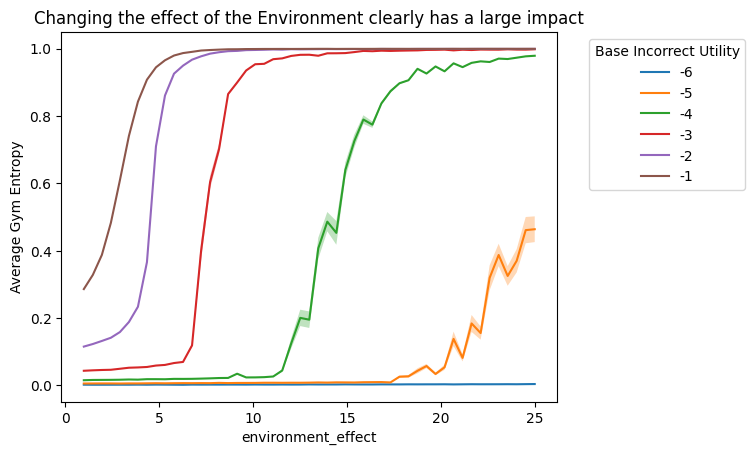

In [17]:
gym_entropy_results.plot(
    title="Changing the effect of the Environment clearly has a large impact",
    ylabel="Average Gym Entropy",
)

# plt.xscale("log")

for i in range(6):
    plt.fill_between(gym_entropy_var.index, gym_entropy_results.iloc[:,i] - gym_entropy_var.iloc[:, i]*1.96/np.sqrt(N_sim), gym_entropy_results.iloc[:,i] + gym_entropy_var.iloc[:, i]*1.96/np.sqrt(N_sim), alpha=0.3)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title="Base Incorrect Utility")
plt.show()

### Low Entropy

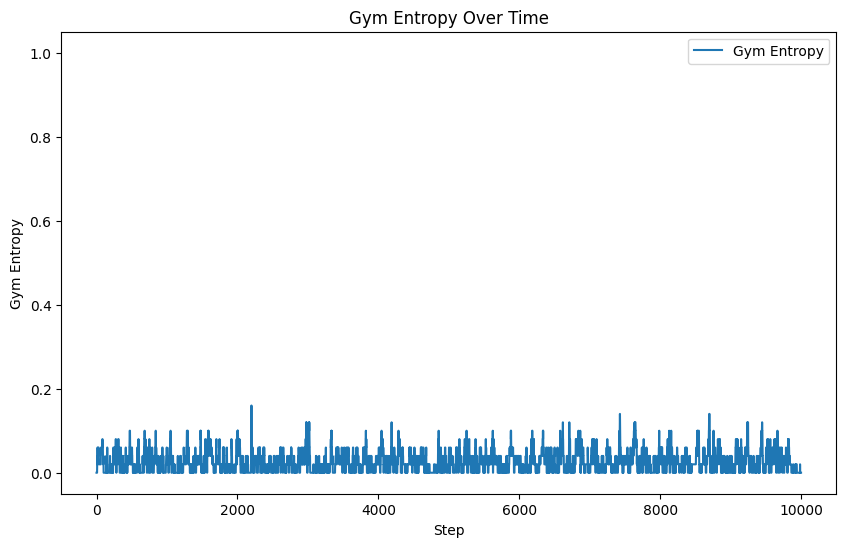

In [6]:
np.random.seed(345)
random.seed(345)
model = gymmodel.GymModel(
    num_employees=1,
    num_attendees=10,
    gym_width=20,
    gym_depth=20,
    base_inc_utility=-4,
    environment_effect=8,
    employee_effect=-2,
    attendee_lambda=1,
    weights=50,
    benches=3,
    deadlifts=3,
    free_weights=3,
)

for i in range(10000):
    model.step()

data = model.datacollector.get_model_vars_dataframe()
gymmodel.plot_gym_entropy(data)

### High Entropy

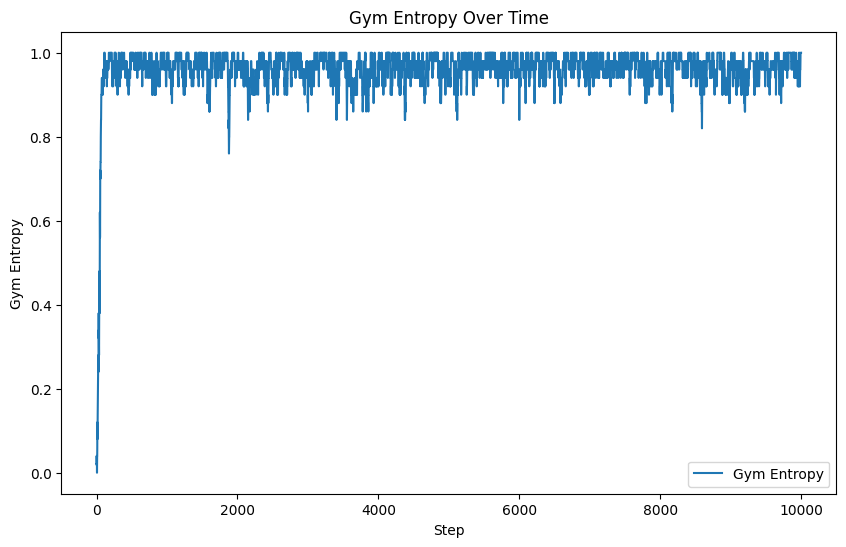

In [7]:
model = gymmodel.GymModel(
    num_employees=1,
    num_attendees=10,
    gym_width=20,
    gym_depth=20,
    base_inc_utility=-2,
    environment_effect=6,
    employee_effect=-2,
    attendee_lambda=1,
    weights=50,
    benches=3,
    deadlifts=3,
    free_weights=3,
)

for i in range(10000):
    model.step()

data = model.datacollector.get_model_vars_dataframe()
gymmodel.plot_gym_entropy(data)

### Low-to-high Entropy

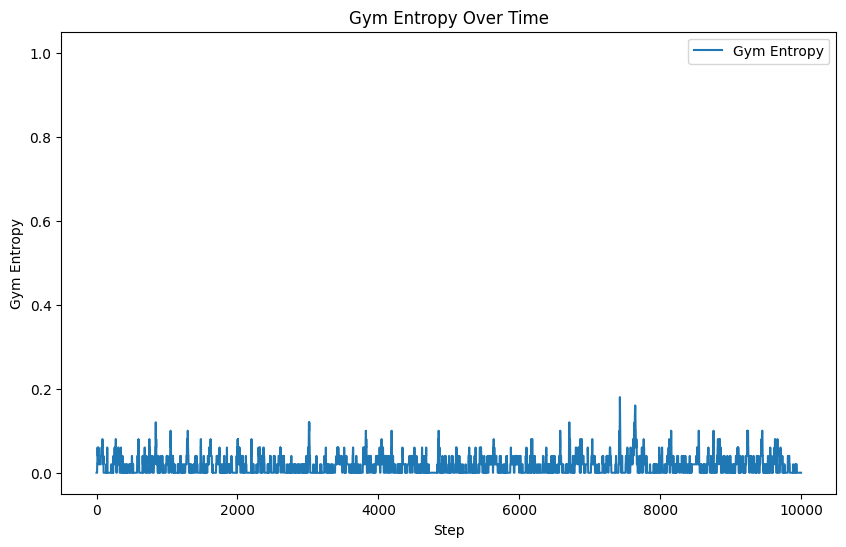

In [8]:
np.random.seed(345)
random.seed(345)
model = gymmodel.GymModel(
    num_employees=1,
    num_attendees=10,
    gym_width=20,
    gym_depth=20,
    base_inc_utility=-4.65,
    environment_effect=15,
    employee_effect=-2,
    attendee_lambda=1,
    weights=50,
    benches=3,
    deadlifts=3,
    free_weights=3,
)

for i in range(10000):
    model.step()

data = model.datacollector.get_model_vars_dataframe()
gymmodel.plot_gym_entropy(data)

### High Entropy peaks

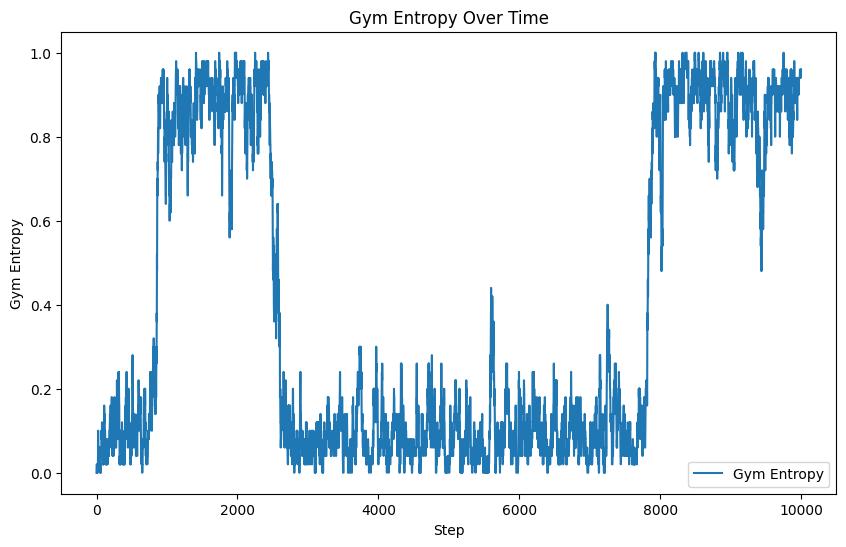

0.396638

In [9]:
np.random.seed(358)
random.seed(358)
model = gymmodel.GymModel(
    num_employees=1,
    num_attendees=10,
    gym_width=20,
    gym_depth=20,
    base_inc_utility=-2.9,
    environment_effect=6,
    employee_effect=-2,
    attendee_lambda=1,
    weights=50,
    benches=3,
    deadlifts=3,
    free_weights=3,
)

for i in range(10000):
    model.step()

data = model.datacollector.get_model_vars_dataframe()
gymmodel.plot_gym_entropy(data)
data.mean()["GymEntropy"]

## Heterogeneous Agents

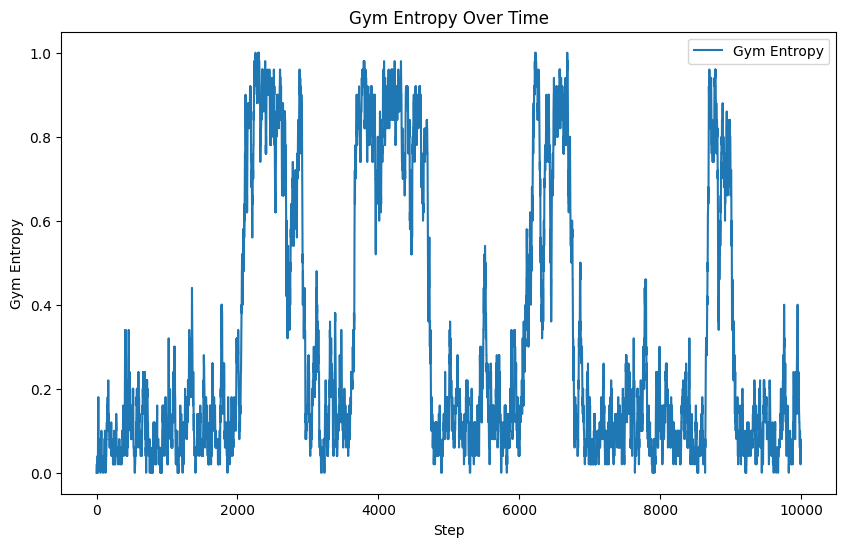

0.31795000000000007

In [10]:
np.random.seed(358)
random.seed(358)
model = gymmodel.GymModel(
    num_employees=1,
    num_attendees=10,
    gym_width=20,
    gym_depth=20,
    base_inc_utility=-2.9,
    environment_effect=6,
    employee_effect=-2,
    attendee_lambda=1,
    weights=50,
    benches=3,
    deadlifts=3,
    free_weights=3,
    heterogeneous_frac=0.05,
    good_frac=0.6
)

for i in range(10000):
    model.step()

data = model.datacollector.get_model_vars_dataframe()
gymmodel.plot_gym_entropy(data)
data.mean()["GymEntropy"]

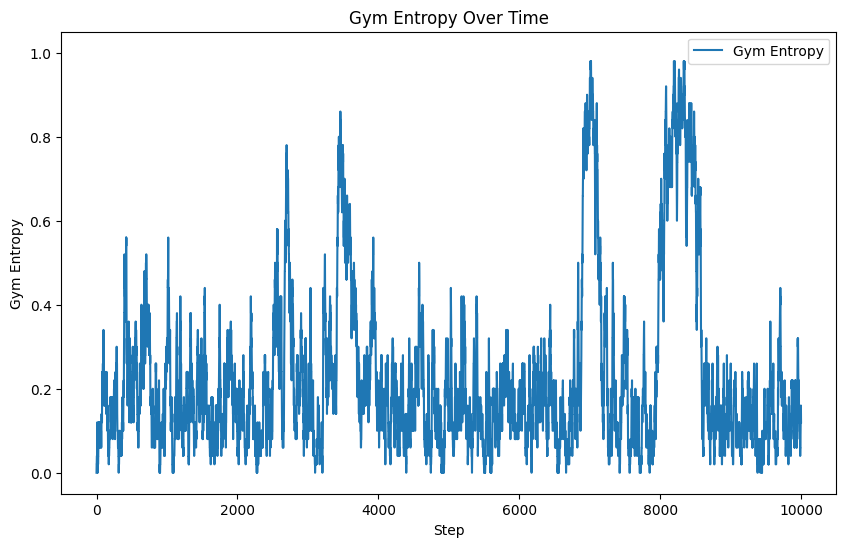

0.22841800000000004

In [11]:
np.random.seed(358)
random.seed(358)
model = gymmodel.GymModel(
    num_employees=1,
    num_attendees=10,
    gym_width=20,
    gym_depth=20,
    base_inc_utility=-2.9,
    environment_effect=6,
    employee_effect=-2,
    attendee_lambda=1,
    weights=50,
    benches=3,
    deadlifts=3,
    free_weights=3,
    heterogeneous_frac=0.10,
    good_frac=0.6
)

for i in range(10000):
    model.step()

data = model.datacollector.get_model_vars_dataframe()
gymmodel.plot_gym_entropy(data)
data.mean()["GymEntropy"]


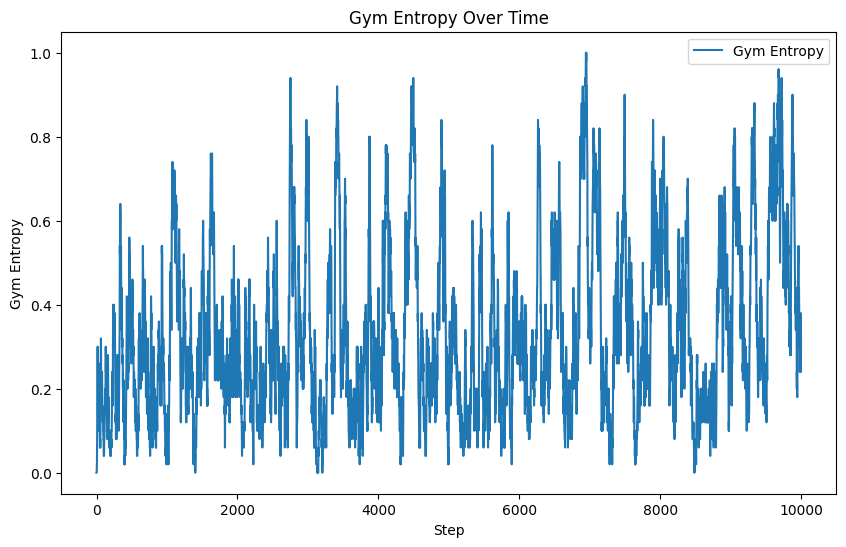

0.33091800000000005

In [12]:
np.random.seed(358)
random.seed(358)
model = gymmodel.GymModel(
    num_employees=1,
    num_attendees=10,
    gym_width=20,
    gym_depth=20,
    base_inc_utility=-2.9,
    environment_effect=6,
    employee_effect=-2,
    attendee_lambda=1,
    weights=50,
    benches=3,
    deadlifts=3,
    free_weights=3,
    heterogeneous_frac=0.25,
    good_frac=0.6
)

for i in range(10000):
    model.step()

data = model.datacollector.get_model_vars_dataframe()
gymmodel.plot_gym_entropy(data)
data.mean()["GymEntropy"]

### First Experiment Rerun

In [18]:
results = mesa.batch_run(
    gymmodel.GymModel,
    {
        "num_employees": 2,
        "num_attendees": 10,
        "gym_width": 20,
        "gym_depth": 20,
        "base_inc_utility": [-6, -5, -4, -3, -2, -1],
        "environment_effect": [
            v for v in np.linspace(1, 25, 51)
        ],
        "employee_effect": -2,
        "attendee_lambda": 1,
        "weights": 50,
        "init_incorrect_weights": 0,
        "benches":3,
        "deadlifts": 3,
        "free_weights": 3,
        "heterogeneous_frac": 0.25,
        "prev_entropy": [gym_entropy_results]
    },
    number_processes=None,
    iterations=N_sim,
    data_collection_period=1,
    max_steps=1000
)

  0%|          | 0/15300 [00:00<?, ?it/s]

In [19]:
results_df_selected = results_df[results_df["Step"] > 15][["base_inc_utility", "environment_effect", "GymEntropy", "RunId"]]

In [20]:
gym_entropy_results_h = (
    results_df_selected
    .groupby(["base_inc_utility", "environment_effect"])
    .mean()["GymEntropy"]
    .unstack()
    .transpose()
)

gym_entropy_var_h = results_df_selected.groupby(["base_inc_utility", "environment_effect", "RunId"]).mean()["GymEntropy"].groupby(["base_inc_utility", "environment_effect"]).var().unstack().transpose()
gym_entropy_results_h

base_inc_utility,-6,-5,-4,-3,-2,-1
environment_effect,,,,,,
1.00,0.002321,0.005817,0.015553,0.043630,0.115397,0.286074
1.48,0.002126,0.005950,0.016360,0.044932,0.123040,0.328228
1.96,0.002128,0.006065,0.016514,0.045961,0.132110,0.387457
2.44,0.002188,0.006019,0.016677,0.046577,0.141628,0.482790
2.92,0.002246,0.005810,0.017015,0.049564,0.158476,0.608941
3.40,0.002221,0.006115,0.017720,0.052641,0.188311,0.740652
3.88,0.002429,0.006086,0.017277,0.053513,0.233642,0.842377
4.36,0.002232,0.006382,0.018659,0.054861,0.366169,0.907585
4.84,0.002569,0.006707,0.018651,0.059091,0.709666,0.944303


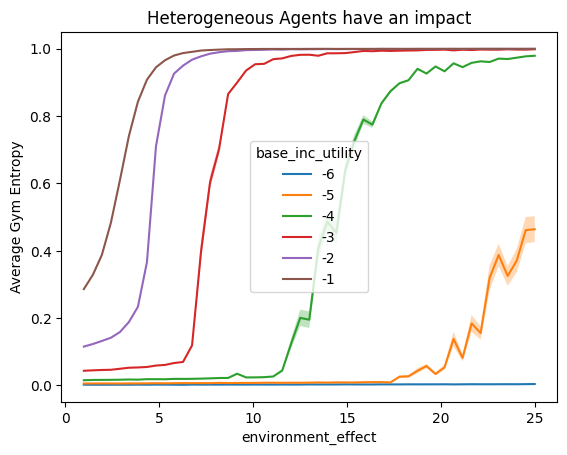

In [21]:
gym_entropy_results_h.plot(
    title="Heterogeneous Agents have an impact",
    ylabel="Average Gym Entropy",
)

# plt.xscale("log")

for i in range(6):
    plt.fill_between(gym_entropy_var_h.index, gym_entropy_results_h.iloc[:,i] - gym_entropy_var_h.iloc[:, i]*1.96/np.sqrt(N_sim), gym_entropy_results_h.iloc[:,i] + gym_entropy_var_h.iloc[:, i]*1.96/np.sqrt(N_sim), alpha=0.3)
plt.show()

## Early Cleaning Strategy

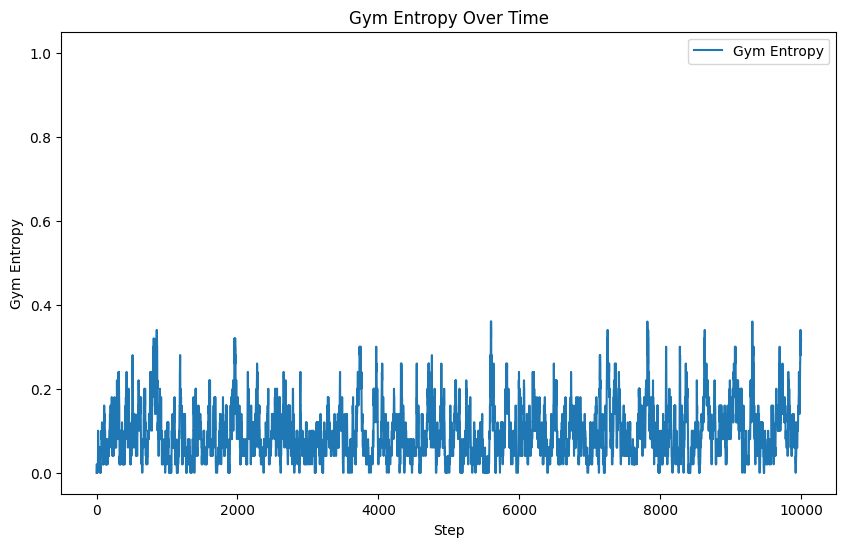

0.093346

In [22]:
np.random.seed(358)
random.seed(358)
model = gymmodel.GymModel(
    num_employees=1,
    num_attendees=10,
    gym_width=20,
    gym_depth=20,
    base_inc_utility=-2.9,
    environment_effect=6,
    employee_effect=-2,
    attendee_lambda=1,
    weights=50,
    benches=3,
    deadlifts=3,
    free_weights=3,
    early_cleaning=True
)

for i in range(10000):
    model.step()

data = model.datacollector.get_model_vars_dataframe()
gymmodel.plot_gym_entropy(data)
data.mean()["GymEntropy"]

In [23]:
data

,IncWeightPlacements,EmpCoverage,EmpericalWeightPlacementProbability,GymEntropy,NrAgents,DevicesAvailable,CleanedWeights
0,0,10.000000,1.00,0.00,12,0,0
1,1,9.923077,0.95,0.02,13,0,0
2,1,10.076923,0.95,0.02,13,1,0
3,1,9.785714,0.95,0.02,14,0,0
4,1,9.909091,0.95,0.02,11,2,0
...,...,...,...,...,...,...,...
9995,14,8.000000,0.30,0.28,5,4,38
9996,16,7.200000,0.20,0.32,5,4,38
9997,14,8.600000,0.30,0.28,5,4,38
9998,15,10.000000,0.25,0.30,5,4,38


In [24]:
results = mesa.batch_run(
    gymmodel.GymModel,
    {
        "num_employees": 2,
        "num_attendees": 10,
        "gym_width": 20,
        "gym_depth": 20,
        "base_inc_utility": [-6, -5, -4, -3, -2, -1],
        "environment_effect": [
            v for v in np.linspace(1, 25, 51)
        ],
        "employee_effect": -2,
        "attendee_lambda": 1,
        "weights": 50,
        "init_incorrect_weights": 0,
        "benches":3,
        "deadlifts": 3,
        "free_weights": 3,
        "early_cleaning": True
    },
    number_processes=None,
    iterations=N_sim,
    data_collection_period=1,
    max_steps=1000
)

  0%|          | 0/15300 [00:00<?, ?it/s]

In [25]:
results_df = pd.DataFrame(results)
gym_entropy_results = (
    results_df[results_df["Step"] > 15] # Ignore first 15 steps to achieve some sort of steady state
    .groupby(["base_inc_utility", "environment_effect"])
    .mean()["GymEntropy"]
    .unstack()
    .transpose()
)

gym_entropy_var = results_df[results_df["Step"] > 15].groupby(["base_inc_utility", "environment_effect", "RunId"]).mean()["GymEntropy"].groupby(["base_inc_utility", "environment_effect"]).var().unstack().transpose()

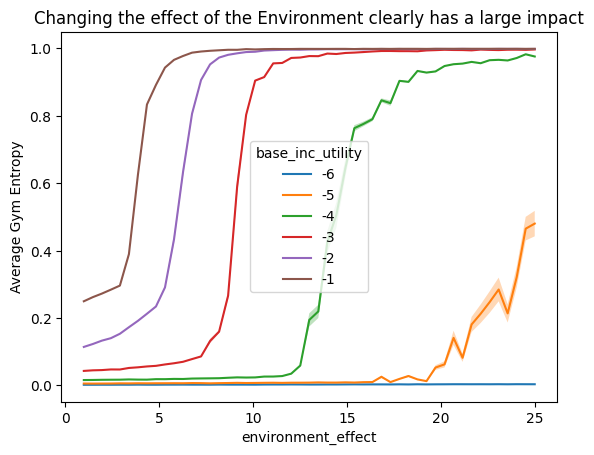

In [26]:
gym_entropy_results.plot(
    title="Changing the effect of the Environment clearly has a large impact",
    ylabel="Average Gym Entropy",
)

# plt.xscale("log")

for i in range(6):
    plt.fill_between(gym_entropy_var.index, gym_entropy_results.iloc[:,i] - gym_entropy_var.iloc[:, i]*1.96/np.sqrt(N_sim), gym_entropy_results.iloc[:,i] + gym_entropy_var.iloc[:, i]*1.96/np.sqrt(N_sim), alpha=0.3)
plt.show()

<Axes: title={'center': 'Returned Gym Weights per variable'}, xlabel='environment_effect', ylabel='Gym Weights returned'>

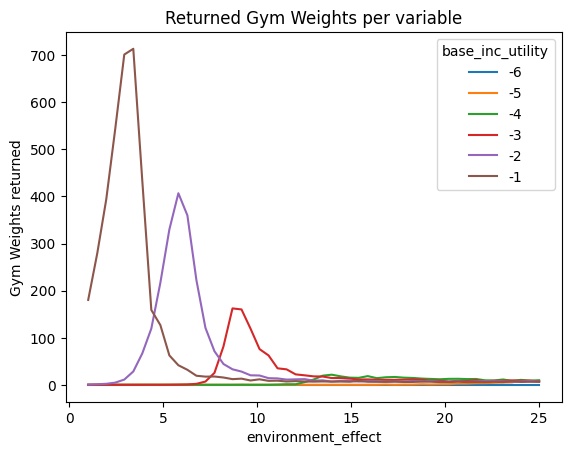

In [27]:
gym_weights_returned = results_df[results_df["Step"] == 999].groupby(["base_inc_utility", "environment_effect"]).mean()["CleanedWeights"].unstack().transpose()
gym_weights_returned.plot(
    title="Returned Gym Weights per variable",
    ylabel="Gym Weights returned",
)

## Sensitivity Analysis

In [28]:
from tqdm.notebook import tqdm
from SALib.sample import saltelli
from SALib.analyze import sobol
from itertools import combinations

In [29]:
problem = {
  'num_vars': 4,
  'names': ['base_inc_utility', 'environment_effect', 'employee_effect', 'attendee_lambda'],
  'bounds': [[-10, -1], [1, 16], [-5, -1], [0.2, 1.2]]
}

samples = saltelli.sample(problem, 1024) # Increase to 1024 for the final run
samples

/var/folders/tn/8dx8j7jn26q_ckdsfpq25f540000gn/T/ipykernel_82915/1220984846.py:7: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  samples = saltelli.sample(problem, 1024) # Increase to 1024 for the final run


array([[-9.98681641,  6.64697266, -3.20898438,  0.68681641],
       [-4.98583984,  6.64697266, -3.20898438,  0.68681641],
       [-9.98681641, 13.66357422, -3.20898438,  0.68681641],
       ...,
       [-4.32666016, 10.86572266, -1.27539062,  0.23173828],
       [-4.32666016, 10.86572266, -4.52929688,  0.55107422],
       [-4.32666016, 10.86572266, -4.52929688,  0.23173828]])

In [30]:
np.random.seed(358)
random.seed(358)

results = np.zeros((len(samples), 7))

for j, c in enumerate(tqdm(samples)):
    model = gymmodel.GymModel(
        num_employees=1,
        num_attendees=10,
        gym_width=20,
        gym_depth=20,
        base_inc_utility=c[0],
        environment_effect=c[1],
        employee_effect=c[2],
        attendee_lambda=c[3],
        weights=50,
        benches=3,
        deadlifts=3,
        free_weights=3,
        heterogeneous_frac=0.25,
        good_frac=0.6
    )
    
    for i in range(1000):
        model.step()

    results[j] = model.datacollector.get_model_vars_dataframe().iloc[-1]

results

  0%|          | 0/10240 [00:00<?, ?it/s]

array([[ 1.00000000e+01,  7.80000000e+00,  5.00000000e-01, ...,
         5.00000000e+00,  4.00000000e+00,  0.00000000e+00],
       [ 3.00000000e+00,  1.20000000e+01,  9.70000000e-01, ...,
         4.00000000e+00,  5.00000000e+00,  0.00000000e+00],
       [ 5.00000000e+00,  8.00000000e+00,  9.37500000e-01, ...,
         2.00000000e+00,  7.00000000e+00,  0.00000000e+00],
       ...,
       [ 3.90000000e+01,  9.66666667e+00,  2.50000000e-02, ...,
         3.00000000e+00,  6.00000000e+00,  0.00000000e+00],
       [ 4.10000000e+01,  1.23333333e+01,  5.44444444e-01, ...,
         3.00000000e+00,  6.00000000e+00,  0.00000000e+00],
       [ 4.50000000e+01,  1.10000000e+01, -1.25000000e-01, ...,
         3.00000000e+00,  6.00000000e+00,  0.00000000e+00]])

In [31]:
analysis = sobol.analyze(problem, results[:,3], print_to_console=True)

                          ST   ST_conf
base_inc_utility    0.812395  0.062223
environment_effect  0.535198  0.059213
employee_effect     0.115848  0.022246
attendee_lambda     0.131388  0.022834
                          S1   S1_conf
base_inc_utility    0.470528  0.065985
environment_effect  0.178165  0.063680
employee_effect     0.011192  0.030428
attendee_lambda     0.012902  0.026946
                                              S2   S2_conf
(base_inc_utility, environment_effect)  0.198370  0.096770
(base_inc_utility, employee_effect)    -0.023358  0.069872
(base_inc_utility, attendee_lambda)    -0.021245  0.073732
(environment_effect, employee_effect)   0.008026  0.079054
(environment_effect, attendee_lambda)   0.014399  0.080928
(employee_effect, attendee_lambda)     -0.032928  0.044045


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


In [32]:
def plot_index(s, params, i, title=''):
    """
    Creates a plot for Sobol sensitivity analysis that shows the contributions
    of each parameter to the global sensitivity.

    Args:
        s (dict): dictionary {'S#': dict, 'S#_conf': dict} of dicts that hold
            the values for a set of parameters
        params (list): the parameters taken from s
        i (str): string that indicates what order the sensitivity is.
        title (str): title for the plot
    """

    if i == '2':
        p = len(params)
        params = list(combinations(params, 2))
        indices = s['S' + i].reshape((p ** 2))
        indices = indices[~np.isnan(indices)]
        errors = s['S' + i + '_conf'].reshape((p ** 2))
        errors = errors[~np.isnan(errors)]
    else:
        indices = s['S' + i]
        errors = s['S' + i + '_conf']
        plt.figure()

    l = len(indices)

    plt.title(title)
    plt.ylim([-0.2, len(indices) - 1 + 0.2])
    plt.yticks(range(l), params)
    plt.errorbar(indices, range(l), xerr=errors, linestyle='None', marker='o')
    plt.axvline(0, c='k')
    plt.show()

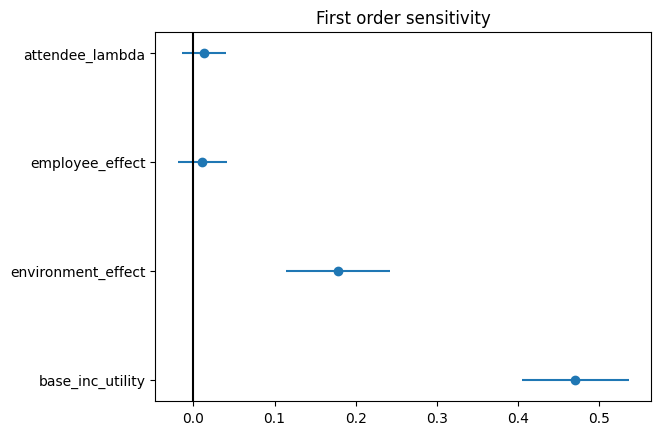

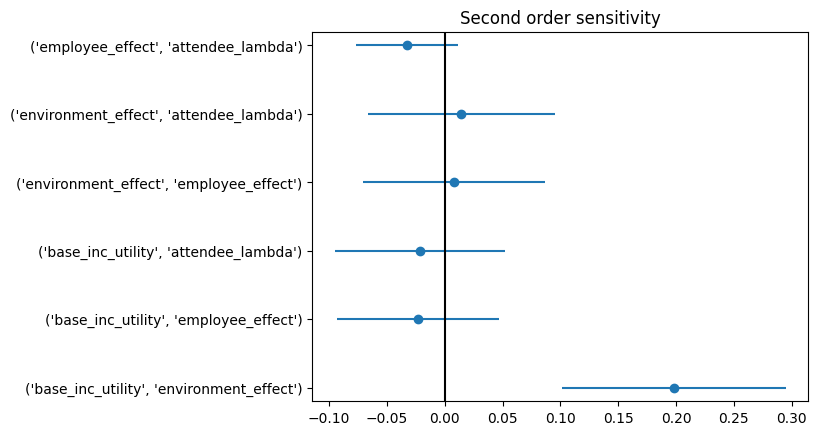

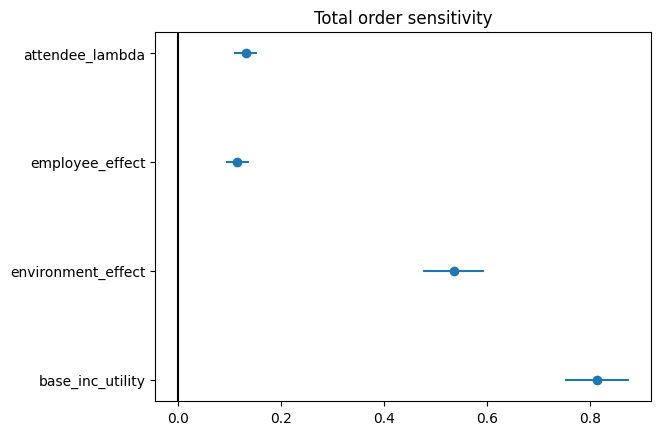

In [33]:
plot_index(analysis, ['base_inc_utility', 'environment_effect', 'employee_effect', 'attendee_lambda'], "1", "First order sensitivity")
plot_index(analysis, ['base_inc_utility', 'environment_effect', 'employee_effect', 'attendee_lambda'], "2", "Second order sensitivity")
plot_index(analysis, ['base_inc_utility', 'environment_effect', 'employee_effect', 'attendee_lambda'], "T", "Total order sensitivity")
